# Enunciado

**Descrição do projeto:**

Você será encarregado(a) de realizar um projeto para comparar diferentes métodos de amostragem. Este projeto será conduzido de forma virtual, levando em consideração a natureza do ensino à distância (EAD).

**Passos do projeto:**

1. Seleção da população virtual: 

Identifique e defina uma população virtual que possa ser acessada com facilidade, como estudantes de um curso online, membros de uma comunidade virtual, seguidores em redes sociais etc.

2. Métodos de amostragem: 

Escolha pelo menos dois métodos de amostragem para comparar. Exemplos incluem amostragem aleatória simples, amostragem estratificada, amostragem por conglomerados, entre outros.

3. Simulação da amostragem: 

Utilize ferramentas online para simular a aplicação dos métodos de amostragem na população virtual selecionada.

4. Coleta de dados simulados: 

Simule a coleta de dados, utilizando ferramentas virtuais para representar os resultados obtidos através das amostras.

5. Análise comparativa: 

Compare os resultados obtidos com cada método de amostragem simulado. Considere aspectos como eficiência, representatividade, praticidade e viabilidade para estudantes EAD.

6. Apresentação dos resultados: 

Prepare um breve relatório que descreva o processo do projeto, os métodos utilizados, os resultados simulados e as conclusões tiradas da comparação entre os métodos de amostragem.

7. Observações:

Os estudantes podem usar dados de alguma pesquisa ou estimar valores.

Entregar um relatório com os tópicos apresentados acima.

# Resolução

O dataset de trabalho hipotético será composto de 5 turmas sucessivas (900 a 950 pessoas cada turma) de um curso profissional preparatório.
As dimensões analíticas contempladas serão:

- $X_{1}$ (Turma):
$$
x_{1} \in \mathbb{I} \; | \; 1 \le x_{1} \le 5
$$

- $X_{2}$ (Sexo):
$$
x_{2} \in \{M, F\}
$$

- $X_{3}$ (Nota Final):\*
$$
x_{3} \in \mathbb{R} \; | \; 0 \le x_{3} \le 10
$$


- $X_{4}$ (Conclusão):
$$
x_{4} \in \{\text{True}, \text{False}\}
$$



A partir do Dataset gerado, duas técnicas de amostragem diferentes serão empregadas para gerar amostras a serem avaliadas:
1. Amostragem Aleatória Simples\
   1.1. Com repetição\
   1.2. Sem repetição
2. Amostragem Sistemática

Partindo-se das amostras geradas, estas serão comparadas quanto a qualidade, expressa em termos de representatividade e eficiência, em relação à população.

\* **Para simplificação didática, considerar nota final como uma nota composta de avaliações realizadas ao longo do curso, e não uma nota pontualmente composta no final do curso.**

## Setup

In [1]:
import pandas as pd
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt
import os

In [2]:
np.random.seed(123)

## Base de dados

In [3]:
# Funções auxiliares

def generate_finish_status(student: dict) -> bool:
    if student['final_grade'] >= 9:
        return np.random.choice(a=[True, False], p=[0.9, 0.1])
    elif 6 <= student['final_grade'] < 9:
        if student['sex'] == 'M':
            return np.random.choice(a=[True, False], p=[0.7, 0.3])
        return np.random.choice(a=[True, False], p=[0.8, 0.2])
    elif 4 <= student['final_grade'] < 6:
        if student['sex'] == 'M':
            return np.random.choice(a=[True, False], p=[0.6, 0.4])
        return np.random.choice(a=[True, False], p=[0.5, 0.5])
    return np.random.choice(a=[True, False], p=[0.35, 0.65])

print("""
Explicação:
Para gerar algum grau de variabilidade nos dados, foi criada uma heurística
relacionando conclusão do curso a sexo e nota final.
Se o aluno possui nota final maior do que 9, a chance dele ter finalizado é
de 90%
 - Nota Final >= 9 ------------> P(X4) = 0.9
 - 6 <= Nota Final < 9 --------> P(X4) = 0.7 se homem e P(X4) = 0.8 se mulher
 - 4 <= Nota Final < 6 --------> P(X4) = 0.6 se homem e P(X4) = 0.5 se mulher
 - Nota Final < 4 -------------> P(X4) = 0.35
""")


Explicação:
Para gerar algum grau de variabilidade nos dados, foi criada uma heurística
relacionando conclusão do curso a sexo e nota final.
Se o aluno possui nota final maior do que 9, a chance dele ter finalizado é
de 90%
 - Nota Final >= 9 ------------> P(X4) = 0.9
 - 6 <= Nota Final < 9 --------> P(X4) = 0.7 se homem e P(X4) = 0.8 se mulher
 - 4 <= Nota Final < 6 --------> P(X4) = 0.6 se homem e P(X4) = 0.5 se mulher
 - Nota Final < 4 -------------> P(X4) = 0.35



In [4]:
classes = [class_number for class_number in range(1, 6)]
data = []

# Iterando sobre turmas
for class_number in classes:
    class_students = []
    class_total_count = np.random.randint(900, 951)
    for student_index in range(class_total_count):
        base_student = dict([('class', class_number)])
        base_student['sex'] = np.random.choice(a=['M', 'F'], p=[0.6, 0.4])
        base_student['final_grade'] = float(f'{np.random.normal(loc=6.5, scale=1.0):.1f}')
        base_student['finished'] = generate_finish_status(base_student)
        class_students.append(base_student)
    # Incorporamos a turma à população
    print(f'Turma {class_number}: {class_total_count} alunos')
    data.extend(class_students)

print(f'Total: {len(data)} alunos')

Turma 1: 945 alunos
Turma 2: 928 alunos
Turma 3: 929 alunos
Turma 4: 918 alunos
Turma 5: 928 alunos
Total: 4648 alunos


In [5]:
df = pd.DataFrame(data=data)
df.head()

,class,sex,final_grade,finished
0,1,M,6.8,False
1,1,M,5.0,False
2,1,F,4.1,True
3,1,F,6.1,True
4,1,M,8.0,True


## Amostragem

Para calcular o tamanho mínimo da amostra, usaremos a fórmula de Slovin:
$$
n = \frac{N}{1 + (N \times e^2)}
$$
Onde:
- $n$ é o tamanho da amostra
- $N$ é o tamanho da população
- $e$ é a margem de erro assumida, que para este caso será de 0.05.


In [8]:
sample_size = int(np.ceil(df.shape[0] / ( 1 + ( df.shape[0] * ( 0.05 ) ** 2 ))))
print(f'O tamanho mínimo calculado que espera-se para a amostra é de {sample_size}')

O tamanho mínimo calculado que espera-se para a amostra é de 369


### Amostra Aleatória Simples

$$
s = \{x_{i_{1}},x_{i_{2}},\dots,x_{i_{k}}\} \space | \space P(x_{1}) = P(x_{2}) = ... = P(x_{k}) = \frac{1}{n}
$$

#### Sem Repetição (AAS)

Com esta técnica, escolhemos $n$ vezes um elemento aleatório da população, garantindo que este elemento apareça no máximo uma única vez na amostra final.

In [9]:
simple_random_sample_without_replacement = []
chosen_numbers = []
while len(simple_random_sample_without_replacement) < sample_size:
    random_choice = np.random.randint(low=0, high=df.shape[0])
    if random_choice not in chosen_numbers:
        simple_random_sample_without_replacement += [df.loc[random_choice].copy().to_dict()]
        chosen_numbers += [random_choice]
print(f'Amostra Aleatória Simples sem repetição finalizada ({len(simple_random_sample_without_replacement)} elementos)')

Amostra Aleatória Simples sem repetição finalizada (369 elementos)


In [10]:
df_aas = pd.DataFrame(data=simple_random_sample_without_replacement)
df_aas.head()

,class,sex,final_grade,finished
0,5,F,5.8,True
1,4,M,8.4,True
2,2,M,7.4,True
3,5,F,6.3,True
4,3,M,7.6,True


#### Com Repetição (AASc)

Com esta técnica, escolhemos $n$ vezes elementos aleatórios da população, independente da repetição.

In [11]:
simple_random_sample_with_replacement = []
chosen_numbers = []
for i in range(sample_size):
    random_choice = np.random.randint(low=0, high=df.shape[0])
    simple_random_sample_with_replacement += [df.loc[random_choice].copy().to_dict()]
print(f'Amostra Aleatória Simples com repetição finalizada ({len(simple_random_sample_with_replacement)} elementos)')

Amostra Aleatória Simples com repetição finalizada (369 elementos)


In [12]:
df_aasc = pd.DataFrame(data=simple_random_sample_with_replacement)
df_aasc.head()

,class,sex,final_grade,finished
0,2,F,6.7,True
1,4,M,7.1,False
2,3,M,6.7,False
3,3,M,6.7,True
4,2,M,7.1,False


### Amostra Sistemática

Hipoteticamente, usaremos esta técnica para estudar conclusão (`finished`) do curso.
Para isso, a primeira coisa a ser feita deve ser ordenar o dataframe em relação à variável de estudo:

In [13]:
df_systematic_sample = df.sort_values(by=['finished']).reset_index()
df_systematic_sample.head()

,index,class,sex,final_grade,finished
0,0,1,M,6.8,False
1,1583,2,F,5.9,False
2,1581,2,M,5.7,False
3,1580,2,F,8.3,False
4,1579,2,M,7.1,False


Em seguida, calcula-se o fator de sistematização $k$:
$$
k = \frac{N}{n}
$$

In [14]:
k_factor = int(np.floor(df_systematic_sample.shape[0] / sample_size))
print(f'O fator de sistematização k é {k_factor}')

O fator de sistematização k é 12


Em seguida, escolhemos um número aleatório de 1 a $k$, de onde a contagem e coleta sistemática começará:

In [15]:
start_point = np.random.randint(low=0, high=k_factor)
print(f'A contagem começará do {start_point}º elemento, com coletas sucessivas em intervalos de {k_factor} elementos')

A contagem começará do 2º elemento, com coletas sucessivas em intervalos de 12 elementos


In [16]:
systematic_sample = []
next_item = start_point
for i in range(sample_size):
    systematic_sample += [df_systematic_sample.loc[next_item].copy().to_dict()]
    next_item += k_factor
print(f'Amostra Sistemática finalizada ({len(systematic_sample)} elementos)')

Amostra Sistemática finalizada (369 elementos)


In [17]:
df_ss = pd.DataFrame(data=systematic_sample)
df_ss.head()

,index,class,sex,final_grade,finished
0,1581,2,M,5.7,False
1,3556,4,M,7.3,False
2,3537,4,M,6.7,False
3,3518,4,M,6.9,False
4,1599,2,M,7.1,False


## Resultados

A partir do dataset simulado, com **4648 observações**, foram geradas **três** amostras diferentes, baseadas em três técnicas de amostragem probabilística:
1. **Amostra Aleatória Simples sem repetição**
2. **Amostra Aleatória Simples com repetição**
3. **Amostra Sistemática**

Para o cálculo do tamanho mínimo amostral, foi utilizada a [fórmula de Slovin](https://statorials.org/pt/formula-de-slovins/), obtendo-se o tamanho mínimo de **369 elementos**, base para coleta em todas as amostras.

### Proporção

Analisando a **proporção** da **distribuição de turmas** na população e em cada uma das 3 amostras:

In [18]:
def analyze_report(col_analyzed:str, data:pd.DataFrame, df_label:str) -> None:
    for value in df[col_analyzed].unique():
        print(f'{value}: {data[data[col_analyzed] == value].shape[0] / data.shape[0]:.2f}')
    print('')

In [19]:
analyzing_aspect = "Proporção de turma"

print(f'{analyzing_aspect} --> População')
analyze_report(col_analyzed='class', data=df, df_label='populacao')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples sem repetição (ASS)')
analyze_report(col_analyzed='class', data=df_aas, df_label='AAS')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples com repetição (ASSc)')
analyze_report(col_analyzed='class', data=df_aasc, df_label='AASc')

print(f'{analyzing_aspect} --> Amostra Sistemática')
analyze_report(col_analyzed='class', data=df_ss, df_label='sys_sample')

Proporção de turma --> População
1: 0.20
2: 0.20
3: 0.20
4: 0.20
5: 0.20

Proporção de turma --> Amostra Aleatória Simples sem repetição (ASS)
1: 0.16
2: 0.21
3: 0.21
4: 0.21
5: 0.20

Proporção de turma --> Amostra Aleatória Simples com repetição (ASSc)
1: 0.23
2: 0.20
3: 0.16
4: 0.20
5: 0.22

Proporção de turma --> Amostra Sistemática
1: 0.21
2: 0.18
3: 0.18
4: 0.22
5: 0.22



Analisando a **proporção** da **distribuição de sexo** na população e em cada uma das 3 amostras:

In [20]:
analyzing_aspect = "Proporção de sexo"

print(f'{analyzing_aspect} --> População')
analyze_report(col_analyzed='sex', data=df, df_label='populacao')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples sem repetição (ASS)')
analyze_report(col_analyzed='sex', data=df_aas, df_label='AAS')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples com repetição (ASSc)')
analyze_report(col_analyzed='sex', data=df_aasc, df_label='AASc')

print(f'{analyzing_aspect} --> Amostra Sistemática')
analyze_report(col_analyzed='sex', data=df_ss, df_label='sys_sample')

Proporção de sexo --> População
M: 0.61
F: 0.39

Proporção de sexo --> Amostra Aleatória Simples sem repetição (ASS)
M: 0.59
F: 0.41

Proporção de sexo --> Amostra Aleatória Simples com repetição (ASSc)
M: 0.53
F: 0.47

Proporção de sexo --> Amostra Sistemática
M: 0.58
F: 0.42



Analisando a **proporção** da **distribuição de formados** na população e em cada uma das 3 amostras:

In [21]:
analyzing_aspect = "Proporção de formados"

print(f'{analyzing_aspect} --> População')
analyze_report(col_analyzed='finished', data=df, df_label='populacao')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples sem repetição (AAS)')
analyze_report(col_analyzed='finished', data=df_aas, df_label='AAS')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples com repetição (AASc)')
analyze_report(col_analyzed='finished', data=df_aasc, df_label='AASc')

print(f'{analyzing_aspect} --> Amostra Sistemática')
analyze_report(col_analyzed='finished', data=df_ss, df_label='sys_sample')

Proporção de formados --> População
False: 0.31
True: 0.69

Proporção de formados --> Amostra Aleatória Simples sem repetição (AAS)
False: 0.30
True: 0.70

Proporção de formados --> Amostra Aleatória Simples com repetição (AASc)
False: 0.32
True: 0.68

Proporção de formados --> Amostra Sistemática
False: 0.33
True: 0.67



### Média

Analisando a **média** das **notas finais** na população e em cada uma das 3 amostras:

In [22]:
def analyzing_report_quantitative_general(col_analyzed:str, data:pd.DataFrame, df_label:str) -> str:
    print(f'{data[col_analyzed].mean():.2f}')
    print('')

In [23]:
analyzing_aspect = "Média - Nota Final Geral"


print(f'{analyzing_aspect} --> População')
analyzing_report_quantitative_general(col_analyzed='final_grade', data=df, df_label='populacao')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples sem repetição (ASS)')
analyzing_report_quantitative_general(col_analyzed='final_grade', data=df_aas, df_label='ASS')

print(f'{analyzing_aspect} --> Amostra Aleatória Simples com repetição (ASSc)')
analyzing_report_quantitative_general(col_analyzed='final_grade', data=df_aasc, df_label='ASSc')

print(f'{analyzing_aspect} --> Amostra Sistemática')
analyzing_report_quantitative_general(col_analyzed='final_grade', data=df_ss, df_label='sys_sample')

Média - Nota Final Geral --> População
6.52

Média - Nota Final Geral --> Amostra Aleatória Simples sem repetição (ASS)
6.52

Média - Nota Final Geral --> Amostra Aleatória Simples com repetição (ASSc)
6.56

Média - Nota Final Geral --> Amostra Sistemática
6.63



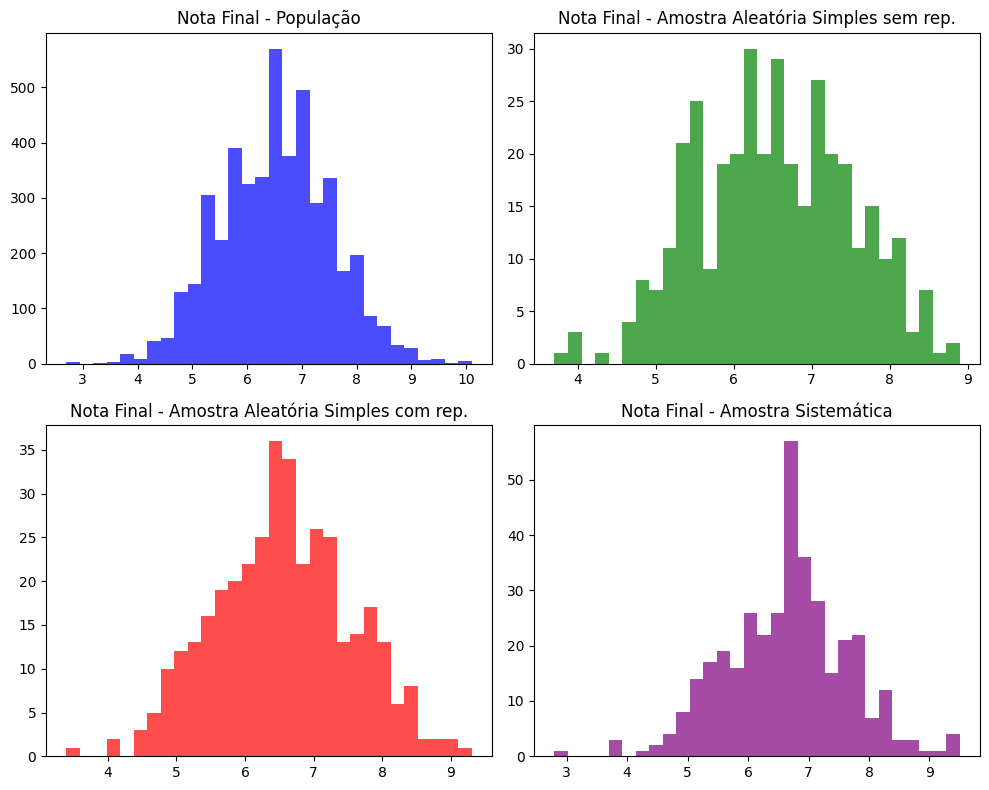

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# hists
axs[0, 0].hist(df['final_grade'], bins=30, color='blue', alpha=0.7)
axs[0, 0].set_title('Nota Final - População')

axs[0, 1].hist(df_aas['final_grade'], bins=30, color='green', alpha=0.7)
axs[0, 1].set_title('Nota Final - Amostra Aleatória Simples sem rep.')

axs[1, 0].hist(df_aasc['final_grade'], bins=30, color='red', alpha=0.7)
axs[1, 0].set_title('Nota Final - Amostra Aleatória Simples com rep.')

axs[1, 1].hist(df_ss['final_grade'], bins=30, color='purple', alpha=0.7)
axs[1, 1].set_title('Nota Final - Amostra Sistemática')

plt.tight_layout()
plt.show()


## Discussão

- **Turma** (`class`): Tanto a amostra aleatória simples sem repetição quanto a amostra sistemática tiveram composições semelhantes à da população em relação ao aspecto turma, com a **amostra sistemática** levando pequena vantagem em relação às amostras aleatórias simples sem reposição. Isso porque a população teve uma distribuição equilibrada de 20% para cada turma, sendo a **amostra sistemática** aquela que se saiu melhor no quesito proporção, seguida da **amostra aleatória simples sem repetição**, que pecou na representação dos alunos da turma 1 (16% versus 20%). Por último a **amostra aleatória simples com repetição** foi aquela que pior representou cada turma se comparado à composição real, o que é teoricamente esperado, já que a probabilidade de seleção de cada elemento é constante, e não se altera em nenhum momento durante o processo de composição da amostra.

- **Sexo** (`sex`): Com uma distribuição real de 61% homens e 39% mulheres, as **amostras sistemática e aleatória simples sem repetição (ASS)** também tiveram proporções muito próximas às proporções reais, com uma ligeira vantagem para a amostra aleatória simples sem repetição, que teve um desvio de apenas dois pontos percentuais (comparado aos três pontos percentuais de desvio da amostra sistemática). A **amostra aleatória simples com repetição** foi a que mais destoou das proporções reais em relação a sexo.

- **Nota final** (`final_grade`): Em relação às notas finais, a amostra aleatória simples sem repetição resultou em uma nota final média idêntica à média real (6.52) e curiosamente apresenta a distribuição de notas finais que mais se destoa em relação ao formato da distribuição real. No entanto, as outras duas amostras também tiveram valores muito próximos aos valores da média real, com leve desvantagem para a amostra sistemática, que foi a que mais se distanciou matematicamente entre as duas restantes.

- **Finalistas** (`finished`): Todas as técnicas resultaram em amostras proporcionalmente próximas em relação ao percentual real de graduados (0.69), com a amostra sistemática sendo aquela que mais se distanciou matematicamente da proporção real.

Uma ideia de investigação ulterior que poderia ser emplacada seria a quebra das dimensões analíticas em estratos (como estratificação por turmas ou faixas de notas finais) e análise das proporções e/ou médias entre estratos para cada amostra.

Como conclusão temos a priori que as três técnicas empregadas resultando em amostras aparentemente representativas, pois refletem padrões próximos àqueles observados na população real. Em termos de implementação, a amostra sistemática requer ordenação do conjunto de dados, o que pode ser uma tarefa complexa e computacionalmente cara em contextos onde o número de elementos dentro da população é grande. Por não necessitar de ordenação, a amostragem aleatória simples (com e sem repetição) acabam levando vantagem devido ao fato de não exigirem esse procedimento, embora possam compartilhar algumas desvantagens como custos na coleta dos elementos.